# Table of Contents

- [Introduction](#introduction)
  - [Initialization](#initialization)
  - [Utility Functions](#utility-functions)
- [Data Unserstanding for the Cyclists dataset](#data-unserstanding-for-the-cyclists-dataset)
  - [Fixing the types](#fixing-the-types)
  - [Data Semantics](#data-semantics)
  - [Analysis of single attributes](#analysis-of-single-attributes)
    - [The `birth_year` attribute](#the-birth_year-attribute)
    - [The `weight` attribute](#the-weight-attribute)
    - [The `height` attribute](#the-height-attribute)
    - [The `nationality` attribute](#the-nationality-attribute)
  - [Correlation](#correlation)
- [Data Unserstanding for the Races dataset](#data-unserstanding-for-the-races-dataset)
  - [Type Casting](#type-casting)
  - [Missing Values](#missing-values)
  - [Semantic analysis of the attributes](#semantic-analysis-of-the-attributes)
  - [Analyis of single attributes](#analyis-of-single-attributes)
    - [The `is_gravel`, `is_tarmac`, `is_cobbled` attributes](#the-is_gravel,-is_tarmac,-is_cobbled-attributes)
    - [Points attributes](#points-attributes)
    - [Cyclist Age attribute](#cyclist-age-attribute)
  - [Correlation](#correlation)
- [Data Transformation for the Cyclists dataset](#data-transformation-for-the-cyclists-dataset)
  - [Handle missing values for weight and height](#handle-missing-values-for-weight-and-height)
  - [Feature Engineering](#feature-engineering)


# Introduction

## Initialization

In [34]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# Other available themes:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Utility Functions

In [35]:
# utility functions


# Example: If a column has values [1.0, 2.5, 3.0, 4.75], the function will return 2 (for 2.5 and 4.75)
def count_non_zero_decimal_values(df, column_name):
    return df[column_name].apply(
        lambda x: x != int(x) if pd.notnull(x) else False
    ).sum()

# Data Unserstanding for the Cyclists dataset

In [36]:
# Load dataset
cyclists_df = pd.read_csv('./cyclists.csv')

# Display dataset information
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [37]:
# Display the first few rows of the dataset
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [38]:
#  number of missing values for each column
missing_values_cyclists = cyclists_df.isnull().sum()

missing_percentage_cyclists = (missing_values_cyclists / len(cyclists_df)) * 100

# DataFrame to display the missing values and their percentages
missing_data_cyclists = pd.DataFrame({
    'Missing Values': missing_values_cyclists,
    'Percentage': missing_percentage_cyclists
})

print("\nMissing Values and Percentage in cyclists_df:")
print(missing_data_cyclists)


Missing Values and Percentage in cyclists_df:
             Missing Values  Percentage
_url                      0    0.000000
name                      0    0.000000
birth_year               13    0.211933
weight                 3056   49.820672
height                 2991   48.761004
nationality               1    0.016303


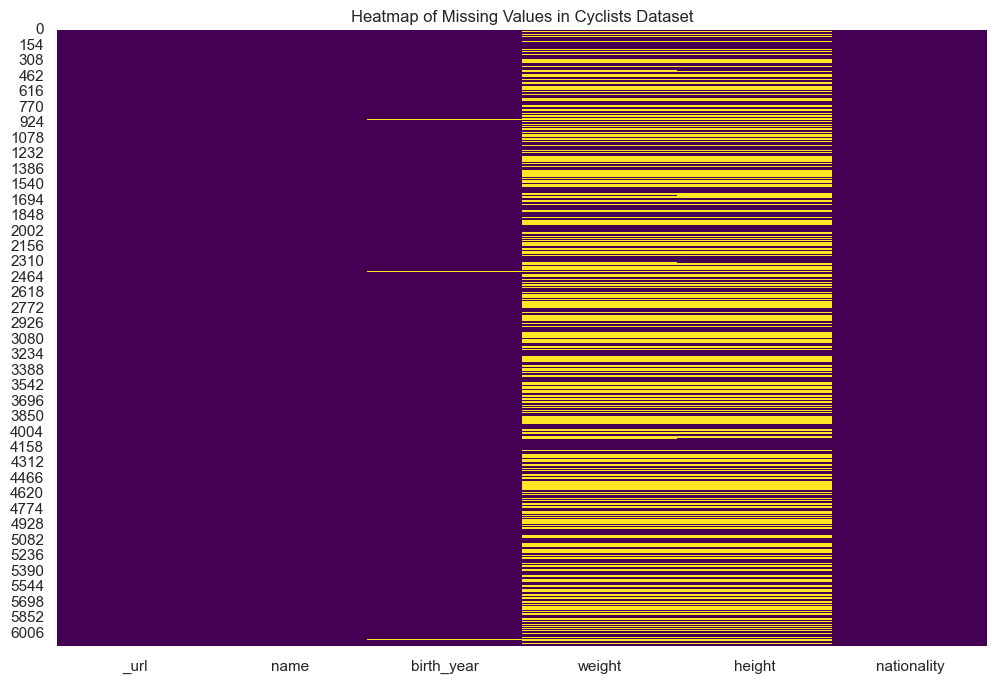

In [39]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Cyclists Dataset')
plt.show()

## Fixing the types


In [40]:
# Cast _url, name, and nationality to string
cyclists_df['_url'] = cyclists_df['_url'].astype('string')
cyclists_df['name'] = cyclists_df['name'].astype('string')
cyclists_df['nationality'] = cyclists_df['nationality'].astype('string')

In [41]:

cyclists_df['birth_year'] = cyclists_df['birth_year'].astype('Int64')


Weight: since not many ... then we cast as int 

In [42]:
# TODO: use count_non_zero_decimal_values()

# Count the number of occurrences of weights that are not .0
print(f"Number of occurrences of weights that are not .0: {count_non_zero_decimal_values(cyclists_df, 'weight')}")

# Approximate weights to the nearest integer, then cast to Int64
cyclists_df['weight'] = cyclists_df['weight'].round().astype('Int64')

# should be 0 now
print(f"Number of occurrences of weights that are not .0: {count_non_zero_decimal_values(cyclists_df, 'weight')}")

Number of occurrences of weights that are not .0: 15
Number of occurrences of weights that are not .0: 0


we cast to int64, since all the values are .0

In [43]:
# Count the number of occurrences of heights that are not .0
non_zero_decimal_heights = cyclists_df['height'].apply(lambda x: x != int(x) if pd.notnull(x) else False).sum()
print(f"Number of occurrences of heights that are not .0: {non_zero_decimal_heights}")

cyclists_df['height'] = cyclists_df['height'].astype('Int64')

Number of occurrences of heights that are not .0: 0


In [44]:
# Print dataset information for cyclists_df
print("Cyclists Dataset Information:")
cyclists_df.info()


Cyclists Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _url         6134 non-null   string
 1   name         6134 non-null   string
 2   birth_year   6121 non-null   Int64 
 3   weight       3078 non-null   Int64 
 4   height       3143 non-null   Int64 
 5   nationality  6133 non-null   string
dtypes: Int64(3), string(3)
memory usage: 305.6 KB


## Data Semantics

In [45]:
# Check for duplicates in the _url column
duplicate_urls = cyclists_df[cyclists_df['_url'].duplicated(keep=False)]

# Display the duplicate entries
print("Duplicate URLs:")
print(duplicate_urls)

Duplicate URLs:
Empty DataFrame
Columns: [_url, name, birth_year, weight, height, nationality]
Index: []


In [46]:
# Check for duplicates in the name column
duplicate_names = cyclists_df[cyclists_df['name'].duplicated(keep=False)]

# Display the duplicate entries
print("Duplicate Names:")
print(duplicate_names)

Duplicate Names:
                            _url                name  birth_year  weight  \
347               andrea-peron-1       Andrea  Peron        1971      70   
1745          roman-kreuziger-sr    Roman  Kreuziger        1965    <NA>   
2235           alessandro-pozzi2   Alessandro  Pozzi        1969    <NA>   
2601             roman-kreuziger    Roman  Kreuziger        1986      65   
2682                andrea-peron       Andrea  Peron        1988      70   
2862       antonio-cabello-baena    Antonio  Cabello        1990      67   
2939               jesus-lopez23        Jesús  López        1955    <NA>   
2953     alberto-fernandez-sainz  Alberto  Fernández        1981    <NA>   
3238             antonio-cabello    Antonio  Cabello        1956    <NA>   
4917  sergio-dominguez-rodriguez   Sergio  Domínguez        1979    <NA>   
4919      sergio-dominguez-munoz   Sergio  Domínguez        1986    <NA>   
5040          jesus-lopez-carril        Jesús  López        1949    <NA

The names are the same, but since the birth year and url are different, it is a different person. SO: no duplicates found.

## Analysis of single attributes

In [47]:
# Summary statistics
cyclists_df.describe()

,birth_year,weight,height
count,6121.0,3078.0,3143.0
mean,1974.071884,68.658869,179.815145
std,15.535834,6.348963,6.443447
min,1933.0,48.0,154.0
25%,1962.0,64.0,175.0
50%,1974.0,69.0,180.0
75%,1987.0,73.0,184.0
max,2004.0,94.0,204.0


In [48]:
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964,<NA>,<NA>,Italy
1,gerard-rue,Gérard Rué,1965,74,182,France
2,jan-maas,Jan Maas,1996,69,189,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995,78,192,Belgium
4,jose-felix-parra,José Félix Parra,1997,55,171,Spain


### The `birth_year` attribute

Summary Statistics for Birth Year:
count         6121.0
mean     1974.071884
std        15.535834
min           1933.0
25%           1962.0
50%           1974.0
75%           1987.0
max           2004.0
Name: birth_year, dtype: Float64


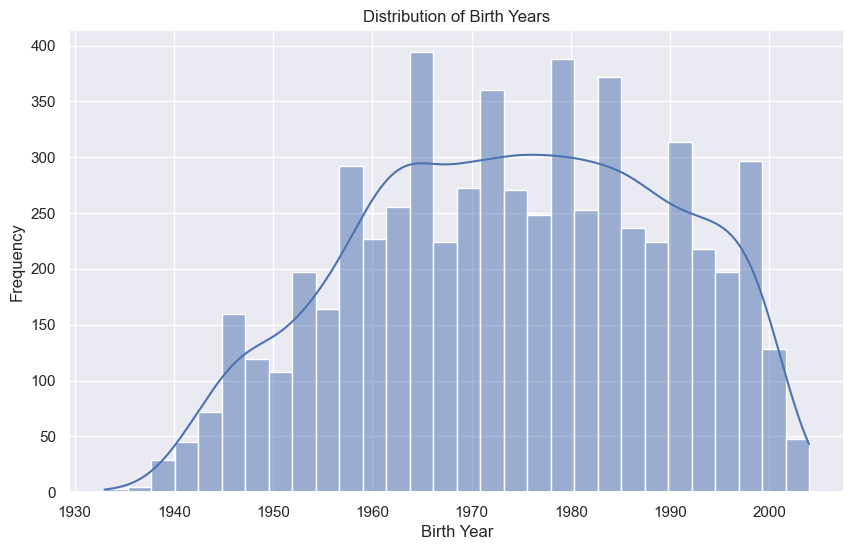

In [49]:
# Summary statistics for birth_year
birth_year_summary = cyclists_df['birth_year'].describe()
print("Summary Statistics for Birth Year:")
print(birth_year_summary)

# Visualize the distribution of birth_year
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

### The `weight` attribute

Summary Statistics for Weight:
count       3078.0
mean     68.658869
std       6.348963
min           48.0
25%           64.0
50%           69.0
75%           73.0
max           94.0
Name: weight, dtype: Float64


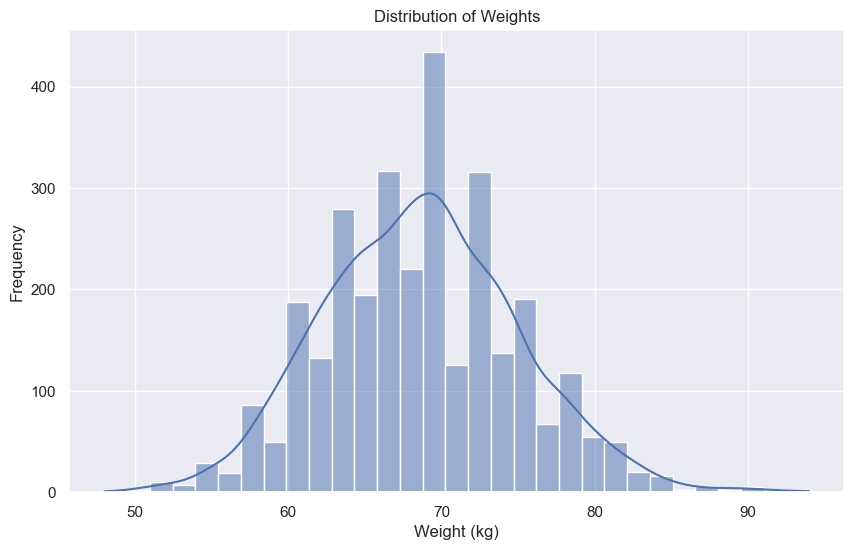

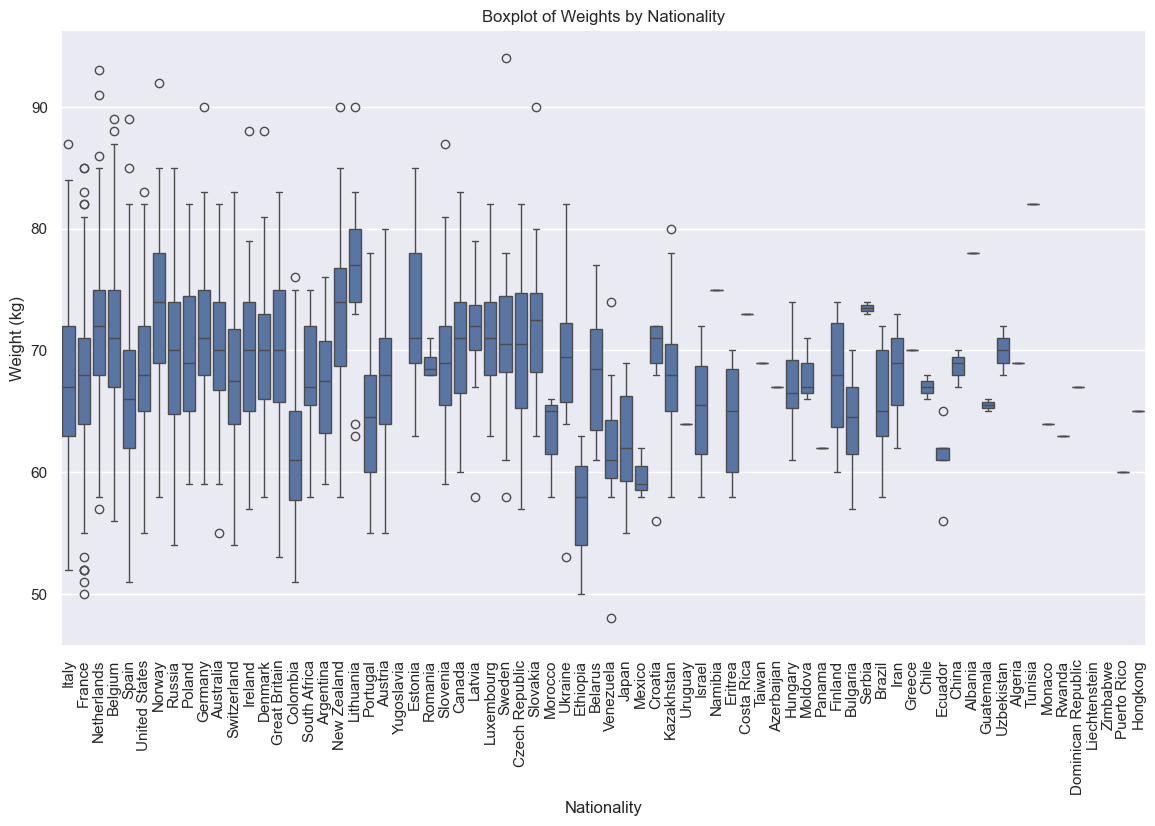

In [50]:
# Summary statistics for weight
weight_summary = cyclists_df['weight'].describe()
print("Summary Statistics for Weight:")
print(weight_summary)

# Visualize the distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), bins='scott', kde=True)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of weights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df)
plt.title('Boxplot of Weights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()


# TODO: controllare gli outliers

### The `height` attribute

Summary Statistics for Height:
count        3143.0
mean     179.815145
std        6.443447
min           154.0
25%           175.0
50%           180.0
75%           184.0
max           204.0
Name: height, dtype: Float64


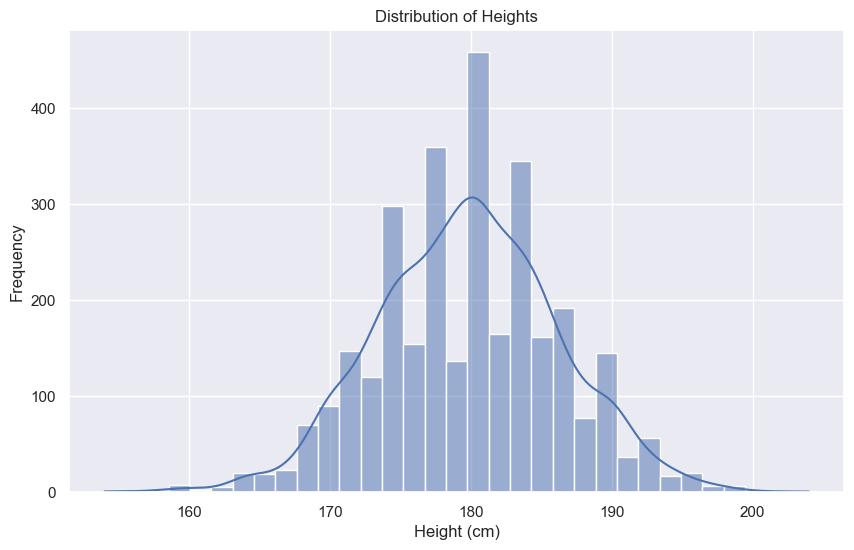

In [51]:
# Summary statistics for height
height_summary = cyclists_df['height'].describe()
print("Summary Statistics for Height:")
print(height_summary)

# Visualize the distribution of height
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), bins='scott', kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

### The `nationality` attribute

Summary Statistics for Nationality:
nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Length: 72, dtype: Int64


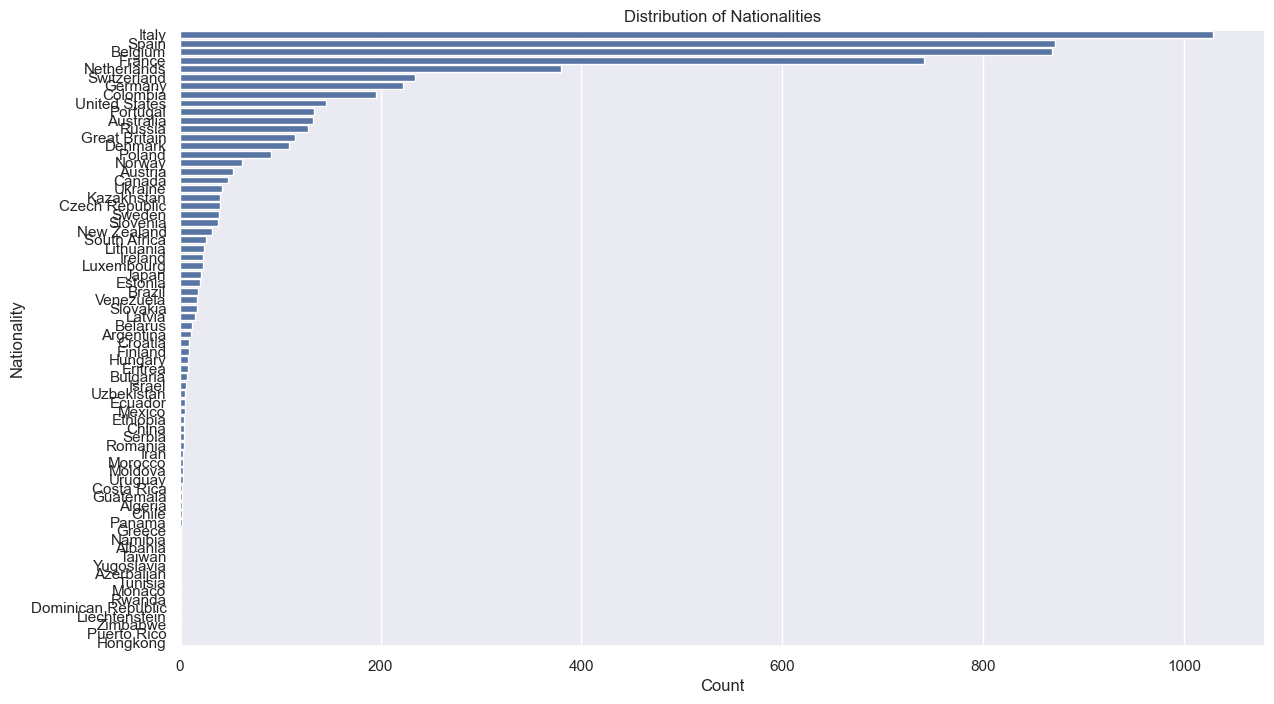

Distinct Nationalities:
<StringArray>
[             'Italy',             'France',        'Netherlands',
            'Belgium',              'Spain',      'United States',
                 <NA>,             'Norway',             'Russia',
             'Poland',            'Germany',          'Australia',
        'Switzerland',            'Ireland',            'Denmark',
      'Great Britain',           'Colombia',       'South Africa',
          'Argentina',        'New Zealand',          'Lithuania',
           'Portugal',            'Austria',         'Yugoslavia',
            'Estonia',            'Romania',           'Slovenia',
             'Canada',             'Latvia',         'Luxembourg',
             'Sweden',     'Czech Republic',           'Slovakia',
            'Morocco',            'Ukraine',           'Ethiopia',
            'Belarus',          'Venezuela',              'Japan',
             'Mexico',            'Croatia',         'Kazakhstan',
            'Uruguay',  

In [52]:
# Summary statistics for nationality
nationality_summary = cyclists_df['nationality'].value_counts()
print("Summary Statistics for Nationality:")
print(nationality_summary)

# Visualize the distribution of nationalities
plt.figure(figsize=(14, 8))
sns.countplot(y='nationality', data=cyclists_df, order=nationality_summary.index)
plt.title('Distribution of Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

# Show distinct nationalities
distinct_nationalities = cyclists_df['nationality'].unique()
print("Distinct Nationalities:")
print(distinct_nationalities)
# TODO: attenzione! c'è 'nan' come nazione, però lo abbiamo risolto più avanti

# Nationalities with low frequency
rare_nationalities = nationality_summary[nationality_summary <= 2]
print("Nationalities with Frequency less or equal than 2:")
print(rare_nationalities)

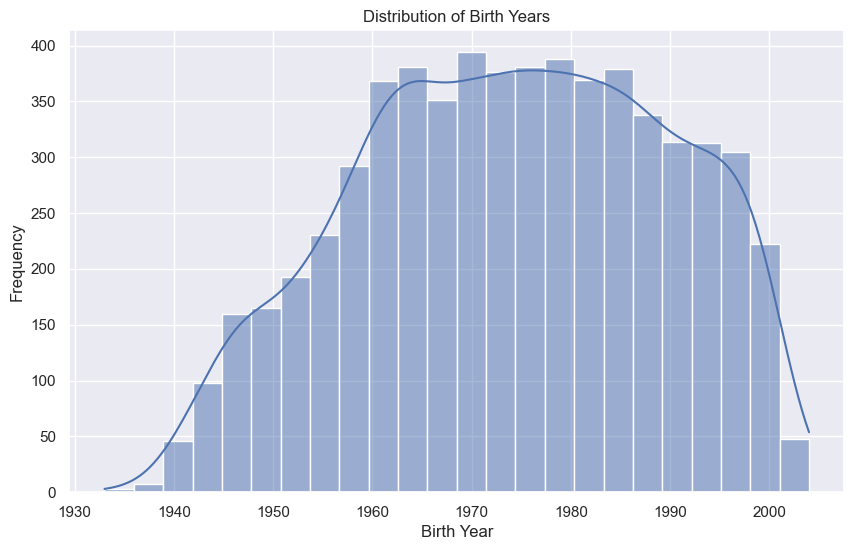

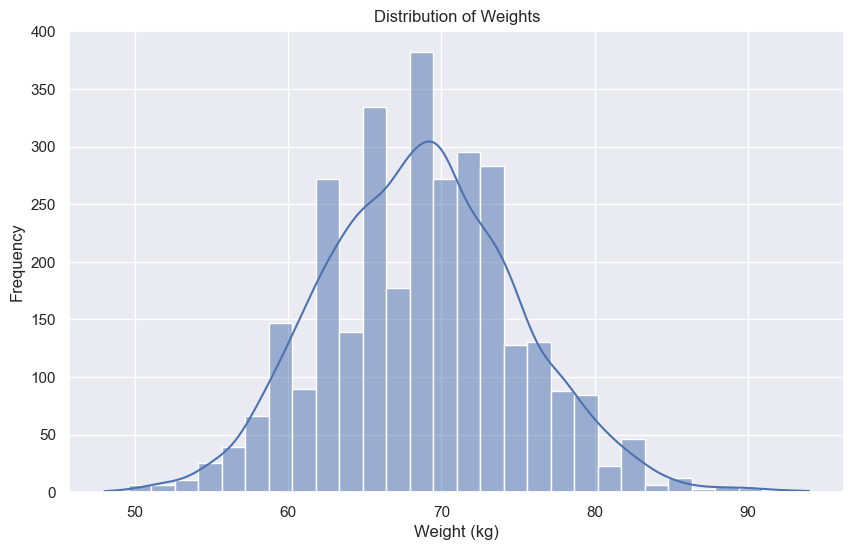

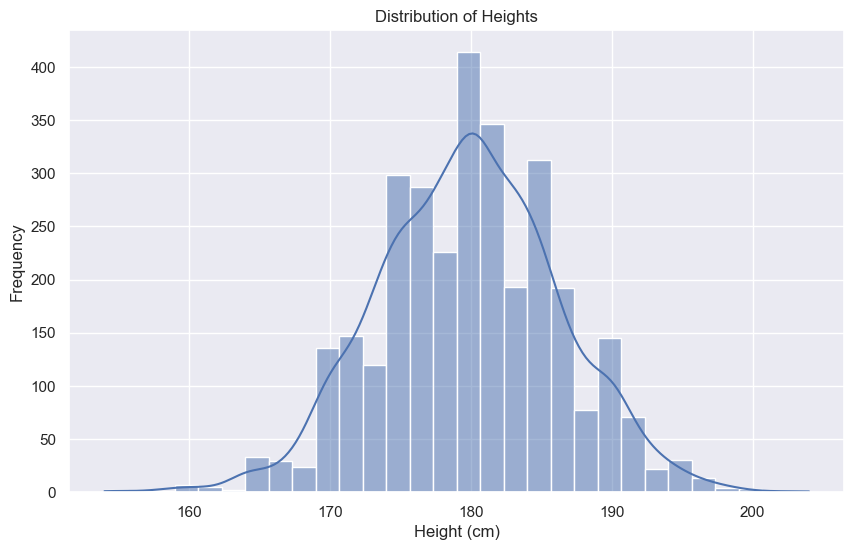

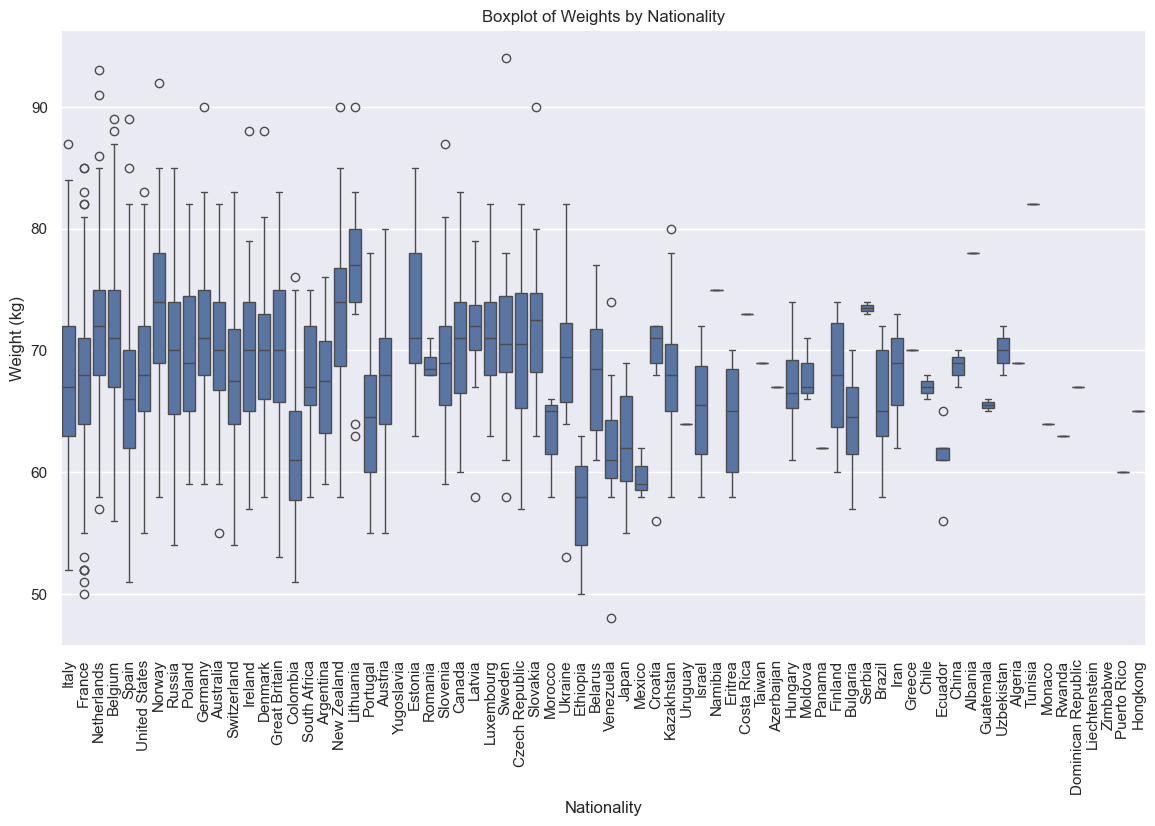

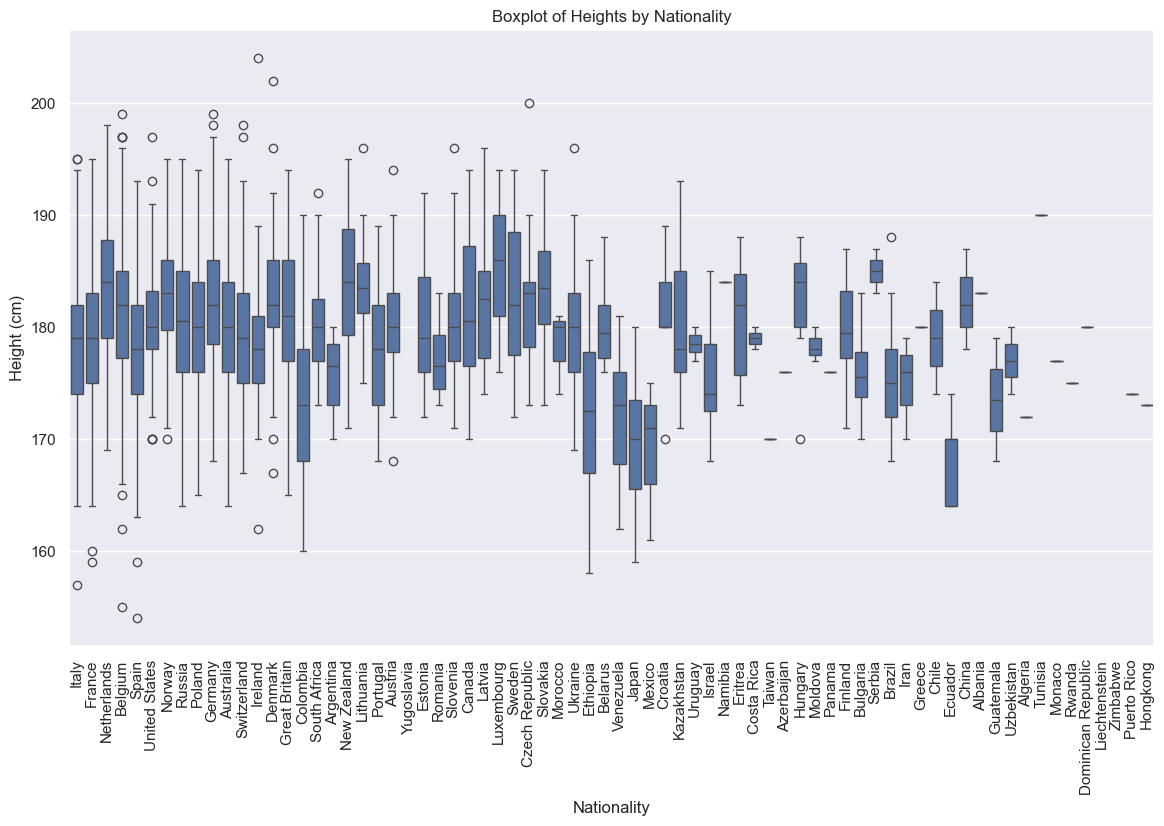

In [53]:
# Distribution of birth years
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna(), bins='scott', kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of weights
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Distribution of heights
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of weights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df)
plt.title('Boxplot of Weights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()

# Boxplot of heights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='height', data=cyclists_df)
plt.title('Boxplot of Heights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Height (cm)')
plt.xticks(rotation=90)
plt.show()

## Correlation

In [54]:
from transformations.values import remove_from_column
from dataunderstanding import correlations
from transformations import center_and_scale, drop_boolean

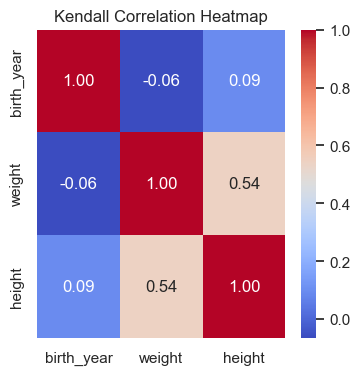

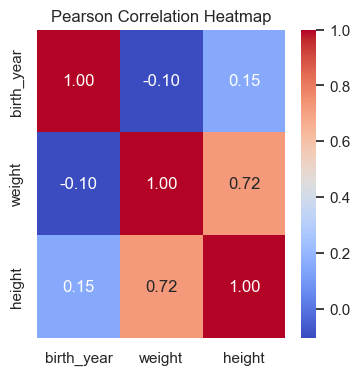

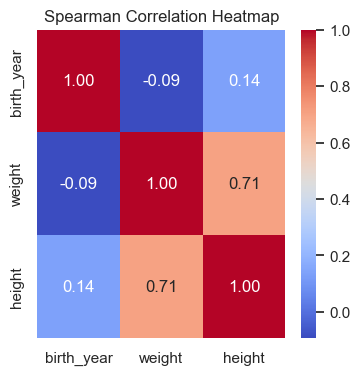

In [55]:

cyclists_df_numeric_only = cyclists_df.select_dtypes(include=['number'])

normalized_dataset, normalization_scalers_dataset = center_and_scale(cyclists_df_numeric_only)
cyclists_correlations = correlations(normalized_dataset)

plt.figure(figsize=(4, 4))
sns.heatmap(cyclists_correlations[cyclists_correlations['correlation_type'] == 'kendall'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation Heatmap')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(cyclists_correlations[cyclists_correlations['correlation_type'] == 'pearson'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(4, 4))
sns.heatmap(cyclists_correlations[cyclists_correlations['correlation_type'] == 'spearman'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()




# Data Unserstanding for the Races dataset

In [56]:
# Load the races dataset
races_df = pd.read_csv('./races.csv')
# Display basic information about the dataset
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [57]:
# Display the first few rows of the dataset
races_df.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


## Type Casting

In [58]:
print(f"Number of occurrences of points that are not .0: {count_non_zero_decimal_values(races_df, 'points')}")
print(f"Number of occurrences of uci_points that are not .0: {count_non_zero_decimal_values(races_df, 'uci_points')}")
print(f"Number of occurrences of profile that are not .0: {count_non_zero_decimal_values(races_df, 'profile')}")
print(f"Number of occurrences of average_temperature that are not .0: {count_non_zero_decimal_values(races_df, 'average_temperature')}")
print(f"Number of occurrences of cyclist_age that are not .0: {count_non_zero_decimal_values(races_df, 'cyclist_age')}")
print(f"Number of occurrences of delta that are not .0: {count_non_zero_decimal_values(races_df, 'delta')}")


Number of occurrences of points that are not .0: 0
Number of occurrences of uci_points that are not .0: 0
Number of occurrences of profile that are not .0: 0
Number of occurrences of average_temperature that are not .0: 0
Number of occurrences of cyclist_age that are not .0: 0
Number of occurrences of delta that are not .0: 0


In [59]:
# TYPE CASTINGS


races_df['_url'] = races_df['_url'].astype('string')
races_df['name'] = races_df['name'].astype('string')
races_df['cyclist'] = races_df['cyclist'].astype('string')
races_df['cyclist_team'] = races_df['cyclist_team'].astype('string')


races_df['points'] = races_df['points'].round().astype('Int64')
races_df['uci_points'] = races_df['uci_points'].round().astype('Int64')
races_df['profile'] = races_df['profile'].round().astype('Int64')
races_df['cyclist_age'] = races_df['cyclist_age'].round().astype('Int64')
races_df['average_temperature'] = races_df['average_temperature'].round().astype('Int64')
races_df['delta'] = races_df['delta'].round().astype('Int64')




# Cast length and climb_total to Int64
races_df['length'] = races_df['length'].round().astype('Int64')
races_df['climb_total'] = races_df['climb_total'].round().astype('Int64')

races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   _url                 589865 non-null  string
 1   name                 589865 non-null  string
 2   points               589388 non-null  Int64 
 3   uci_points           251086 non-null  Int64 
 4   length               589865 non-null  Int64 
 5   climb_total          442820 non-null  Int64 
 6   profile              441671 non-null  Int64 
 7   startlist_quality    589865 non-null  int64 
 8   average_temperature  29933 non-null   Int64 
 9   date                 589865 non-null  object
 10  position             589865 non-null  int64 
 11  cyclist              589865 non-null  string
 12  cyclist_age          589752 non-null  Int64 
 13  is_tarmac            589865 non-null  bool  
 14  is_cobbled           589865 non-null  bool  
 15  is_gravel            589865 non-nu

## Missing Values

We now check for missing values in the dataset.

We begin by checking, for each column, the absolute number of missing values, and the percentage of missing values.

In [60]:
# Calculate the number of missing values for each column
missing_values_races = races_df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage_races = (missing_values_races / len(races_df)) * 100

# Create a DataFrame to display the missing values and their percentages
missing_data_races = pd.DataFrame({
    'Missing Values': missing_values_races,
    'Percentage': missing_percentage_races
})

print("\nMissing Values and Percentage in races_df:")
print(missing_data_races)


Missing Values and Percentage in races_df:
                     Missing Values  Percentage
_url                              0    0.000000
name                              0    0.000000
points                          477    0.080866
uci_points                   338779   57.433311
length                            0    0.000000
climb_total                  147045   24.928585
profile                      148194   25.123376
startlist_quality                 0    0.000000
average_temperature          559932   94.925449
date                              0    0.000000
position                          0    0.000000
cyclist                           0    0.000000
cyclist_age                     113    0.019157
is_tarmac                         0    0.000000
is_cobbled                        0    0.000000
is_gravel                         0    0.000000
cyclist_team                 159161   26.982615
delta                             0    0.000000


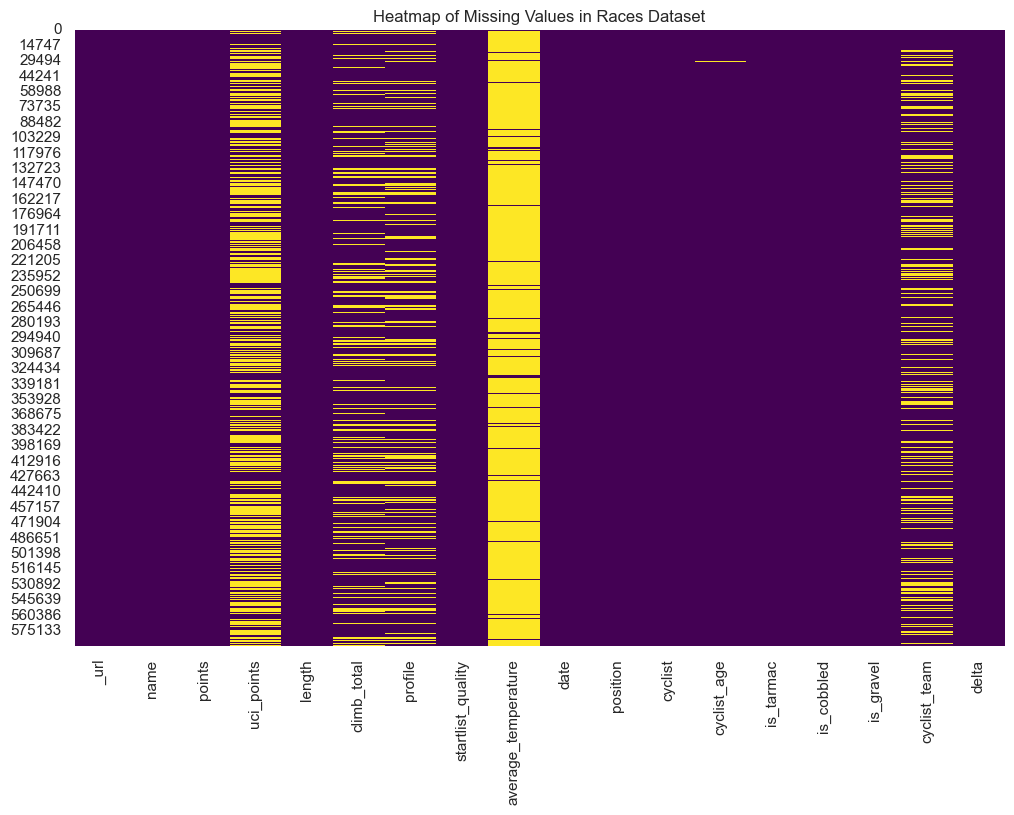

In [61]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(races_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Races Dataset')
plt.show()

since 94% of temperature values are missing, we drop it
todo: remove temperature column
todo: decide what to do with uci_points (57% missing)
todo: decidere cosa fare con gli altri missing

todo: per i team mancanti: fare scraping da procyclingstats per fillare i valori mancanti? 


















## Semantic analysis of the attributes

We now analyze the semantic and statistical properties of the attributes in the dataset to understand the data better, and check for any anomalies.

In [62]:
races_df.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,589388.0,251086.0,589865.0,442820.0,441671.0,589865.000000,29933.0,589865.000000,589752.0,589865.0
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794
std,54.43533,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596
min,18.0,6.0,1000.0,2.0,1.0,115.000000,10.0,0.000000,13.0,-6906.0
25%,50.0,16.0,152500.0,1309.0,1.0,844.000000,17.0,32.000000,26.0,10.0
50%,80.0,60.0,178200.0,2255.0,2.0,988.000000,22.0,70.000000,28.0,156.0
75%,100.0,100.0,203500.0,3273.0,4.0,1309.000000,26.0,112.000000,31.0,624.0
max,350.0,800.0,338000.0,6974.0,5.0,2047.000000,36.0,209.000000,56.0,61547.0


From this description we immeiately observe:
- negative delta values: a clear anomaly
- the youngest cyclist is 13 years old
- profile ranges from 1 to 5
   



todo: togliere il 13enne perché outlier?

todo: cosa vuol dire profile 5.0? nel pdf ci sono solo 4 profili

we notice a negative delta.

In [63]:
# Count the number of negative values in the delta column
negative_delta_count = (races_df['delta'] < 0).sum()
print(f"Number of negative values in delta: {negative_delta_count}")

Number of negative values in delta: 86


Negative deltas is clearly an error, since the time cannot be negative. We will remove them, since they are only 86 values.
todo: rimuovere


---

Each record refering to the same race should have the same values as the other records refering to the same race (except for the attributes specific to the cyclist, such as `cyclist_age`, `delta`, etc). Let's check if this is true.

In [64]:
# TODO: fare questo controllo anche dopo aver fatto transfdormations

# we only want to compare the columns related to the race, not the cyclist
columns_to_compare = ['length', 'climb_total', 'points', 'uci_points', 'profile', 'average_temperature', 'startlist_quality', 'name']

# Group by '_url' and check if the attributes are equal within each group
mismatched_records = races_df.groupby('_url').filter(lambda group: not group[columns_to_compare].apply(lambda x: (x == x.iloc[0]).all()).all())

# Display the mismatched records
print("Records with mismatched attributes:")
print(mismatched_records)


Records with mismatched attributes:
Empty DataFrame
Columns: [_url, name, points, uci_points, length, climb_total, profile, startlist_quality, average_temperature, date, position, cyclist, cyclist_age, is_tarmac, is_cobbled, is_gravel, cyclist_team, delta]
Index: []


No mismatch found, as expected.

---


Let's check if delta and position are semantically coherent.

In [65]:
# Check that for records where position is 0, delta is also 0
position_zero_delta_check = (races_df[races_df['position'] == 0]['delta'] == 0).all()
print(f"All records where position is 0 have delta as 0: {position_zero_delta_check}")

# Check that for records where delta is 0, position is also 0
delta_zero_position_check = (races_df[races_df['delta'] == 0]['position'] == 0).all()
print(f"All records where delta is 0 have position as 0: {delta_zero_position_check}")



All records where position is 0 have delta as 0: True
All records where delta is 0 have position as 0: False


as expected, when position is 0 -> delta zero

on the contrary, when delta is 0, is possible that the position is NOT 0, because many people can arrive at the same time, especially in big races

todo: rimuovere il tempo di inizio dalla data, perché, come dice il pdf, è irrelevant & noisy

Find records where climb_total is greater than length: if found, it would be an anomaly, since the total climb cannot be greater than the length of the race.

In [66]:
invalid_records = races_df[races_df['climb_total'] > races_df['length']]

print("Records where climb_total is greater than length:")
print(invalid_records)

Records where climb_total is greater than length:
Empty DataFrame
Columns: [_url, name, points, uci_points, length, climb_total, profile, startlist_quality, average_temperature, date, position, cyclist, cyclist_age, is_tarmac, is_cobbled, is_gravel, cyclist_team, delta]
Index: []


In [67]:
# check if, for every unique _url, the position value i unique inside that url

# Group by '_url' and check if the 'position' values are unique within each group
position_unique_check = races_df.groupby('_url')['position'].nunique() == races_df.groupby('_url')['position'].count()

# Check if all values are True
all_positions_unique = position_unique_check.all()

print(f"All positions are unique within each _url: {all_positions_unique}")

All positions are unique within each _url: True


## Analyis of single attributes

### The `is_gravel`, `is_tarmac`, `is_cobbled` attributes

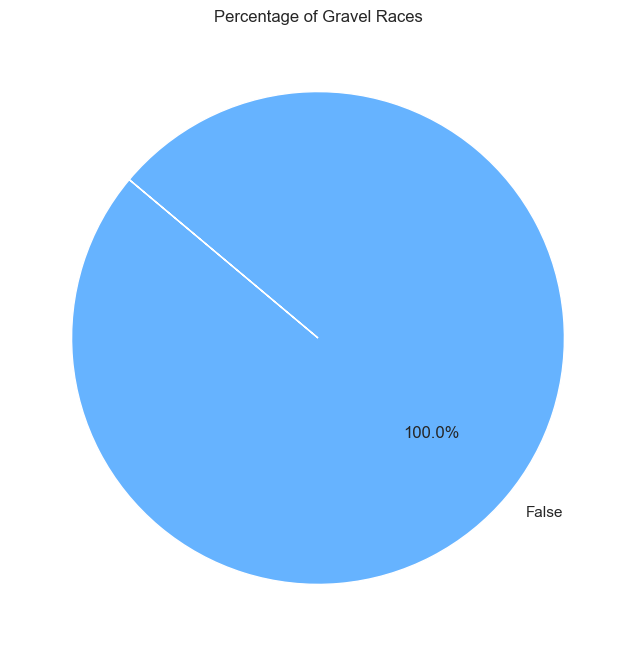

In [68]:
# Calculate the percentage of True and False values in is_gravel
is_gravel_counts = races_df['is_gravel'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_gravel_counts, labels=is_gravel_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Gravel Races')
plt.show()

since all the values are false, we consider dropping the column ...

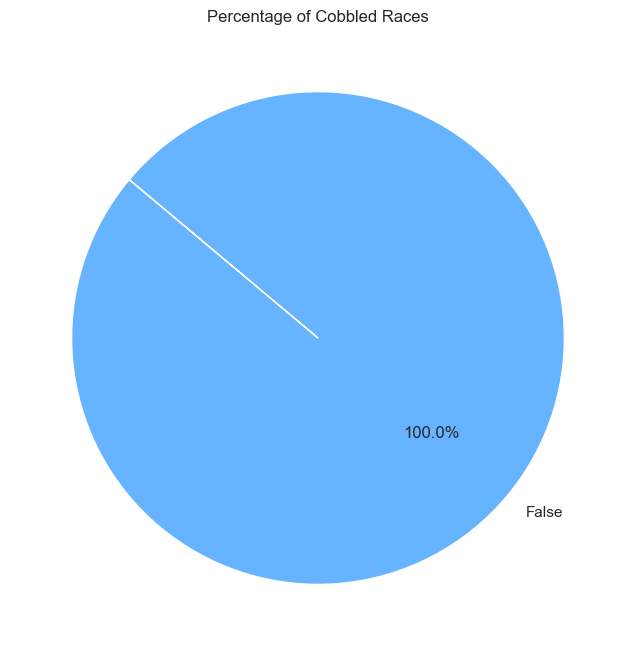

In [69]:
# Calculate the percentage of True and False values in is_cobbled
is_cobbled_counts = races_df['is_cobbled'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_cobbled_counts, labels=is_cobbled_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Cobbled Races')
plt.show()

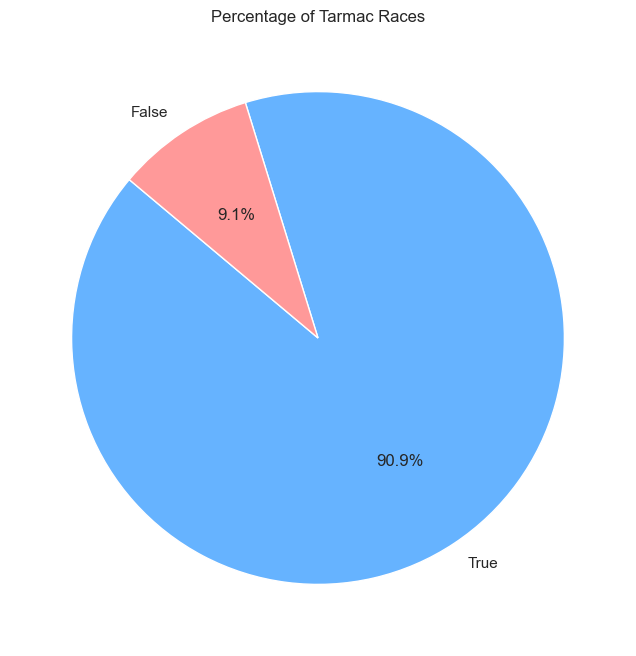

In [70]:
# Calculate the percentage of True and False values in is_tarmac
is_tarmac_counts = races_df['is_tarmac'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(is_tarmac_counts, labels=is_tarmac_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Percentage of Tarmac Races')
plt.show()

In [ ]:
# TODO: osservazioni su questi 3 attributi



### Points attributes

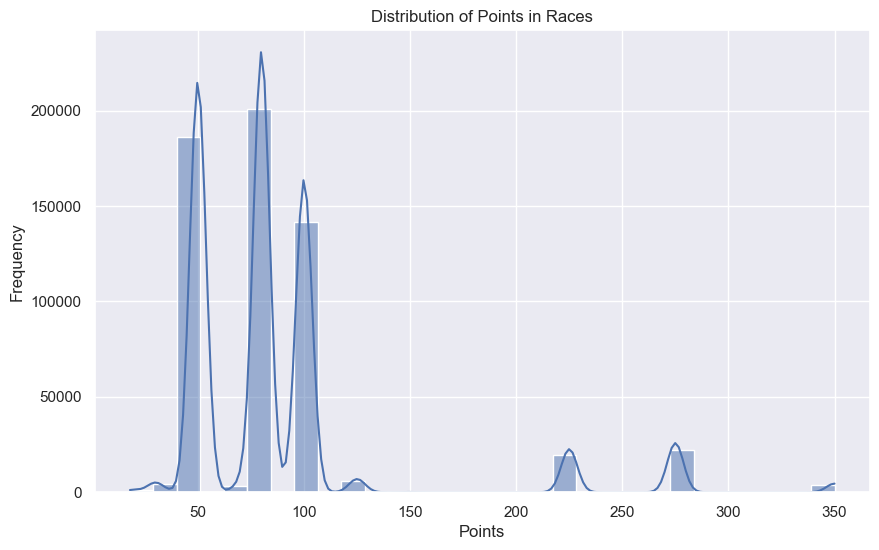

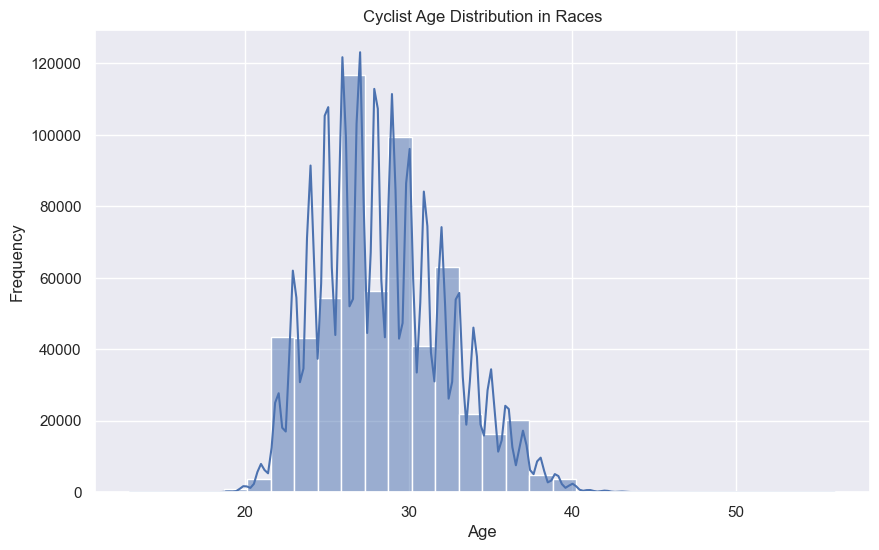

In [ ]:
# Distribution of points in races
plt.figure(figsize=(10, 6))
sns.histplot(races_df['points'].dropna(), bins=30, kde=True)
plt.title('Distribution of Points in Races')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()


### UCI points attribute

### length attribute

### climb_total attribute

### startlist_quality attribute

### average_temperature attribute

### date attribute

### position attribute

### Cyclist Age attribute

In [ ]:

# Cyclist age distribution in races
plt.figure(figsize=(10, 6))
sns.histplot(races_df['cyclist_age'].dropna(), bins=30, kde=True)
plt.title('Cyclist Age Distribution in Races')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### cyclist_team attribute

### delta attribute

## Correlation

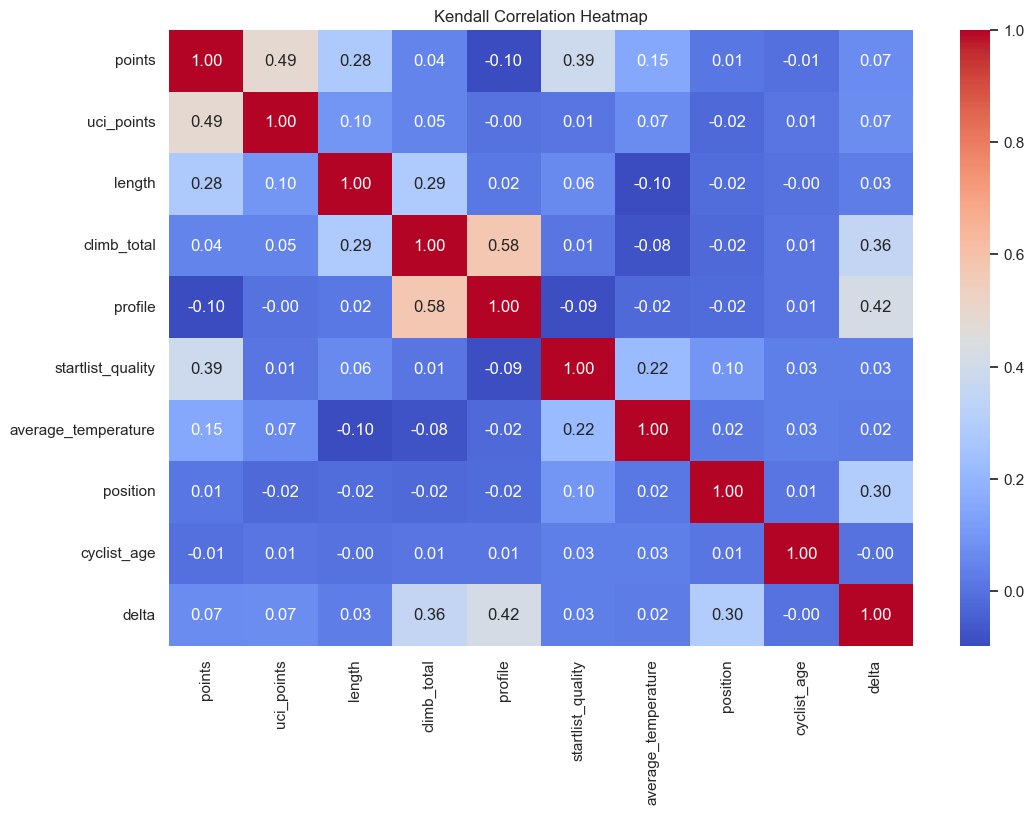

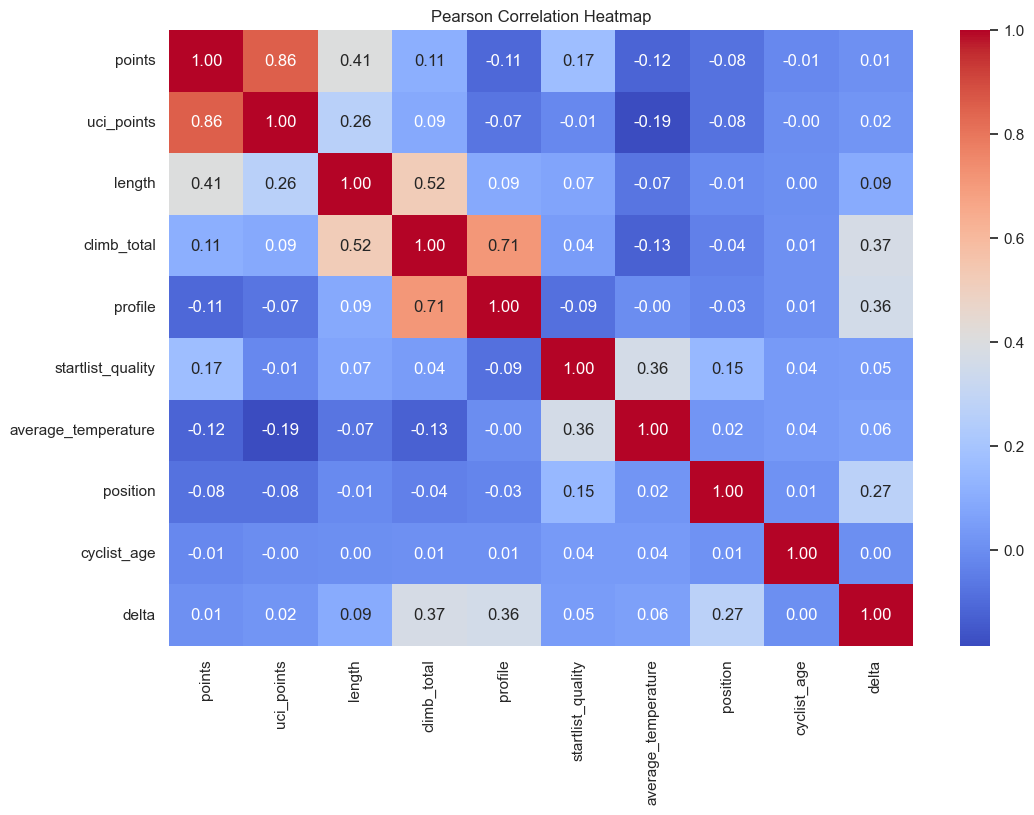

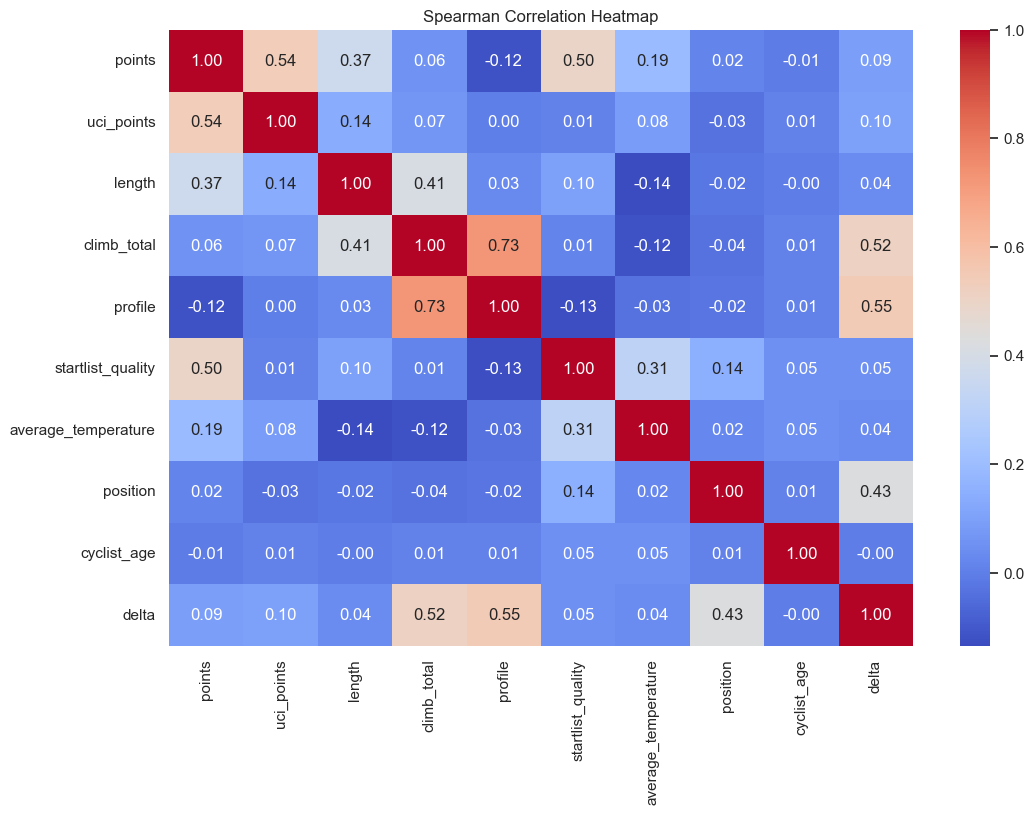

In [73]:

races_df_numeric_only = races_df.select_dtypes(include=['number'])

normalized_dataset, normalization_scalers_dataset = center_and_scale(races_df_numeric_only)
races_correlations = correlations(normalized_dataset)

plt.figure(figsize=(12, 8))
sns.heatmap(races_correlations[races_correlations['correlation_type'] == 'kendall'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendall Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(races_correlations[races_correlations['correlation_type'] == 'pearson'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(races_correlations[races_correlations['correlation_type'] == 'spearman'].drop(columns='correlation_type'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()




# Data Transformation for the Cyclists dataset

## Handle missing values for weight and height
- we want to mantain a normal distribution, so:
- for missing heights: we fill in with a random value taken from the same nationality, and same weight+-3kg. if weight is also missing, we fill in with a random height taken from same nationality.
- for missing weights: we fill in with a random value taken from the same nationality, and same height+-3cm


TODO: implementare questa cosa



---


In [ ]:
# TODO: separare data e orario in due colonne separate
# TODO: togliere temperatura xk 95% dei valori sono nulli
# TODO: novel feature = IMC? 


In [75]:
# TODO: fare una funzione per aggiungere i birth year. aggiungere i valori mancanti da wikipedia manualmente

In [76]:


# TODO: decidere se togliere plamen-stanev, perché è tredicenne https://www.procyclingstats.com/rider/plamen-stanev


# fonte = https://www.wikiwand.com/it/articles/Scott_Davies


# Update the cyclist with the specified URL
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', ['nationality', 'height', 'weight', 'birth_year']] = ['Great Britain', 184, 66, 1995]

# Verify the update
cyclist_updated = cyclists_df[cyclists_df['_url'] == 'scott-davies']
print(cyclist_updated)

# TODO: controllare se ha funzionato

           _url           name  birth_year  weight  height    nationality
9  scott-davies  Scott  Davies        1995      66     184  Great Britain


## Feature Engineering


- per ogni ciclista, il numero di gare che ha vinto?
- per ogni ciclista, una cosa tipo delta * points
- qualcosa con profiles?